In [1]:
import pandas as pd
import re
import unicodedata
import nltk
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sashaqanderson/Dropbox/USGS/ngram/NER_text.csv')

In [3]:
ADDITIONAL_STOPWORDS = ['version', '3', 'keyword', 'data', 'computer', 'program', 'input', 'file', 'output', '13', '4',
                        'upw', 'package', '5', 'u', 'x', '5m', 'grid', 'mississippi', 'document', 'report', ]

In [4]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  sw = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in sw]

In [5]:
words = basic_clean(''.join(str(df['Text'].tolist())))
print(words[:20])

['precipitation', 'threshold', 'used', 'many', 'area', 'provide', 'early', 'warning', 'precipitationinduced', 'landslide', 'debris', 'flow', 'software', 'distribution', 'thresh', 'designed', 'automated', 'tracking', 'precipitation', 'including']


Text(0.5, 0, '# of Occurances')

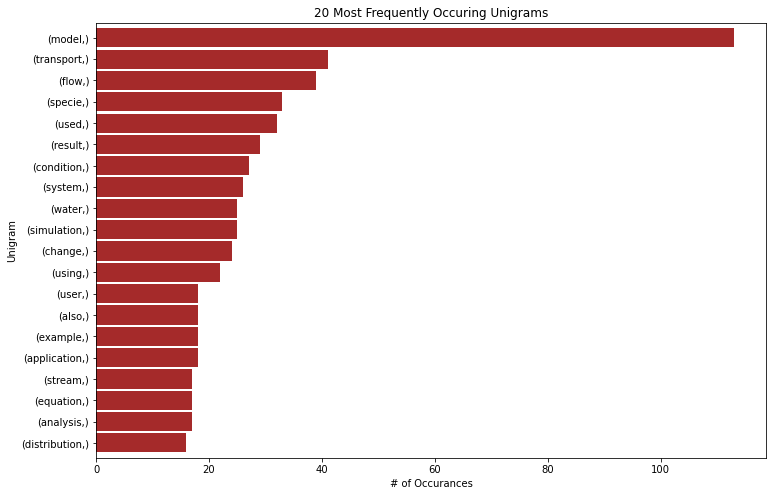

In [10]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]

unigrams_series.sort_values().plot.barh(color='brown', width=.9, figsize=(12, 8))
unigrams_series.sort_values().plot.barh(color='brown', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

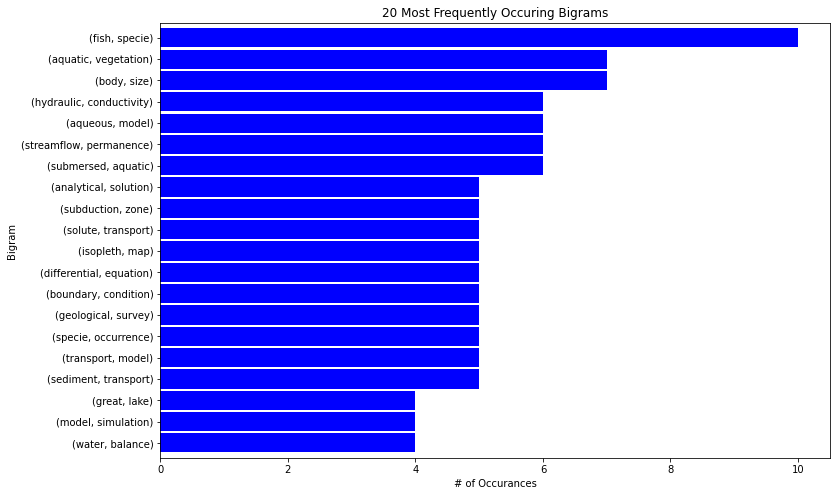

In [6]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

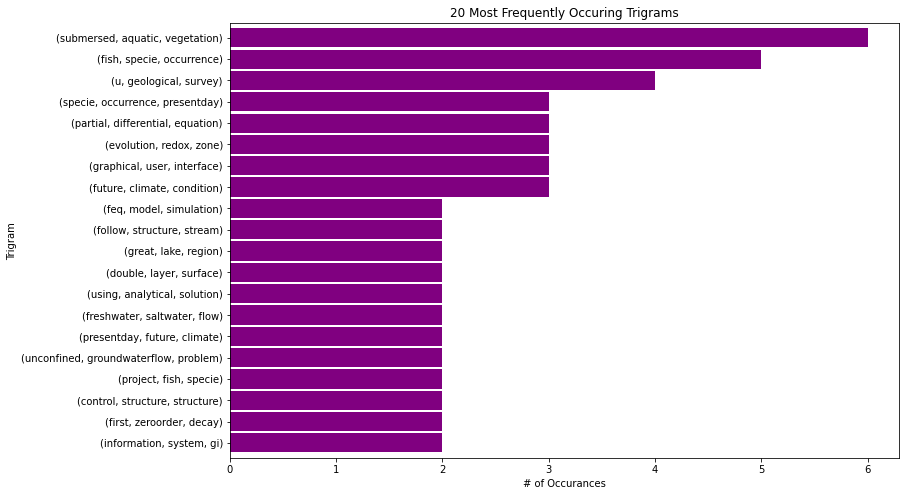

In [7]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

trigrams_series.sort_values().plot.barh(color='purple', width=.9, figsize=(12, 8))

trigrams_series.sort_values().plot.barh(color='purple', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')